In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vpt.common import *
import vpt.settings as s
import vpt.utils.image_processing as ip
import vpt.hand_detection.depth_context_features as dcf
import vpt.hand_detection.depth_image_features as dif

import matplotlib as mpl
s.sensor = "realsense"
%matplotlib inline

In [21]:
dmap = load_depthmap("data/posture/p4/p4a/000175.bin")
dmap = background_sub(dmap)
dmap[dmap<600] = 0
dmap_disp = (ip.normalize2(dmap)*255).astype('uint8')

pixel = (135, 235)

In [22]:
offsets_dcf1 = dcf.generate_feature_offsets(M=4, radius=.15)
offsets_dcf2 = dcf.generate_feature_offsets(M=5, radius=.2)
offsets_dcf3 = dcf.generate_feature_offsets(M=5, radius=.15)

In [23]:
_, dcf_pixels1 = dcf.calc_features(dmap, offsets_dcf1)

dcf_pixels1 = dcf_pixels1.reshape(192, 480, len(offsets_dcf1), 2)
pixel_offsets1 = dcf_pixels1[pixel]
idxs = np.all(pixel_offsets1 != -1, axis=1)
offset_x1 = pixel_offsets1[:, 0]
offset_y1 = pixel_offsets1[:, 1]
offset_x1 = offset_x1[idxs]
offset_y1 = offset_y1[idxs]

_, dcf_pixels2 = dcf.calc_features(dmap, offsets_dcf2)

dcf_pixels2 = dcf_pixels2.reshape(192, 480, len(offsets_dcf2), 2)
pixel_offsets2 = dcf_pixels2[pixel]
idxs = np.all(pixel_offsets2 != -1, axis=1)
offset_x2 = pixel_offsets2[:, 0]
offset_y2 = pixel_offsets2[:, 1]
offset_x2 = offset_x2[idxs]
offset_y2 = offset_y2[idxs]

_, dcf_pixels3 = dcf.calc_features(dmap, offsets_dcf3)

dcf_pixels3 = dcf_pixels3.reshape(192, 480, len(offsets_dcf3), 2)
pixel_offsets3 = dcf_pixels3[pixel]
idxs = np.all(pixel_offsets3 != -1, axis=1)
offset_x3 = pixel_offsets3[:, 0]
offset_y3 = pixel_offsets3[:, 1]
offset_x3 = offset_x3[idxs]
offset_y3 = offset_y3[idxs]

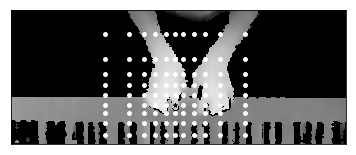

In [24]:
# plt.figure(figsize=(24,12))

# plt.subplot(221)
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.imshow(dmap_disp, cmap="gray", alpha=1)
# # plt.tight_layout()

# plt.subplot(222)
# axes = plt.gca()
# axes.axes.set_ylim([192,0])
# plt.imshow(dmap_disp, cmap="gray", alpha=1)
# plt.scatter(offset_x1, offset_y1, c='white', s=15)
# plt.scatter(pixel[1], pixel[0], c='black', s=15, marker='x')
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# # plt.tight_layout()
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dcf-features-4_15.jpg")

# plt.subplot(223)
axes = plt.gca()
axes.set_ylim([192,0])
plt.imshow(dmap_disp, cmap="gray", alpha=1)
plt.scatter(offset_x3, offset_y3, c='white', s=15)
plt.scatter(pixel[1], pixel[0], c='black', s=15, marker='*')
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
plt.savefig("temp/dcf-features-5_15.jpg")

# plt.subplot(224)
# axes = plt.gca()
# axes.set_ylim([192,0])
# plt.imshow(dmap_disp, cmap="gray", alpha=1)
# plt.scatter(offset_x2, offset_y2, c='white', s=15)
# plt.scatter(pixel[1], pixel[0], c='black', s=15, marker='x')
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dcf-features-5_20.jpg")
# plt.savefig("feature_offsets.pdf")

In [7]:
offsets_dif = dif.generate_feature_offsets(n_offsets=100, radius=25000)

In [8]:
pixels_u, pixels_v = dif.calc_features(dmap, offsets_dif)
pixels_u = pixels_u.reshape(192, 480, len(offsets_dif[1]), 2)
pixels_v = pixels_v.reshape(192, 480, len(offsets_dif[1]), 2)

ValueError: cannot reshape array of size 9216000 into shape (192,480,100,2)

In [ ]:
idxs_u = np.all(pixels_u[pixel] != -1, axis=1)
idxs_v = np.all(pixels_v[pixel] != -1, axis=1)
print(idxs_u.shape)
print(idxs_v.shape)

IndexError: index 235 is out of bounds for axis 1 with size 100

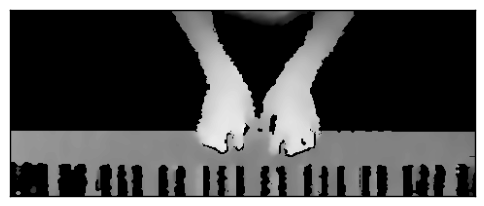

In [12]:
pixel2 = (pixel[0]-30, pixel[1]+50)
n_disp = 20

markers = ['v', 's', 'o', '^'] * 5

# plt.figure(figsize=(24, 12))
# plt.subplot(121)
# axes = plt.gca()
# axes.axes.set_ylim([192,0])
plt.imshow(dmap_disp, cmap="gray", alpha=1)
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")

for i, m in enumerate(markers):
    plt.scatter(pixels_u[pixel][idxs_u][i, 1], pixels_u[pixel][idxs_u][i, 0], c="white", s=40, marker=m)
    plt.scatter(pixels_v[pixel][idxs_v][i, 1], pixels_v[pixel][idxs_v][i, 0], c="white", s=40, marker=m)
    plt.scatter(pixel[1], pixel[0], c="black", s=20, marker="x")

plt.tight_layout()
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dif-features.jpg")
plt.savefig("temp/dif-features.jpg")

# plt.subplot(122)
# axes = plt.gca()
# axes.axes.set_ylim([192,0])
# plt.imshow(dmap_disp, cmap="gray", alpha=.8)
# plt.scatter(pixels_u[pixel2][idxs_u][:n_disp, 1], pixels_u[pixel2][idxs_u][:n_disp, 0], c=cs, s=50, marker="o")
# plt.scatter(pixels_v[pixel2][idxs_v][:n_disp, 1], pixels_v[pixel2][idxs_v][:n_disp, 0], c=cs, s=50, marker='o')
# plt.scatter(pixel2[1], pixel2[0], c='red', s=30, marker="s")
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
# plt.savefig("kinect_offsets.pdf")

In [44]:
data = np.load("data/rdf/testing/p6/000050.npz")
dmap_rdf_disp = data["dmap"]
dmap_rdf_disp = background_sub(dmap_rdf_disp)
dmap_rdf_disp[dmap_rdf_disp==0]=1500
dmap_rdf_disp[dmap_rdf_disp<550]=1500
dmap_rdf_disp[dmap_rdf_disp==1500]=0
dmap_rdf_disp = ip.normalize2(dmap_rdf_disp)

mask_disp = cv2.cvtColor(data["mask"], cv2.COLOR_RGB2GRAY)

In [45]:
offset_gen = dcf.generate_feature_offsets
feature_gen = dcf.calc_features
M = 5
radius = .15
n_samples = 750
base_model_folder = "data/rdf/trainedmodels/"
seg_model_path = os.path.join(base_model_folder, "{:s}_M{:d}_rad{:0.2f}".format("mixed_all_participants", M, radius))

rdf_hs = load_hs_model("Testing", offset_gen, feature_gen, M, radius, n_samples, n_jobs=1, refresh=False, segmentation_model_path=seg_model_path, ms=None, combined=False)

Loading existing hand segmentation model: data/rdf/trainedmodels/mixed_all_participants_M5_rad0.15


In [46]:
mask_pred = rdf_hs.generate_mask(data["dmap"])
mask_pred = cv2.cvtColor(mask_pred, cv2.COLOR_RGB2GRAY)

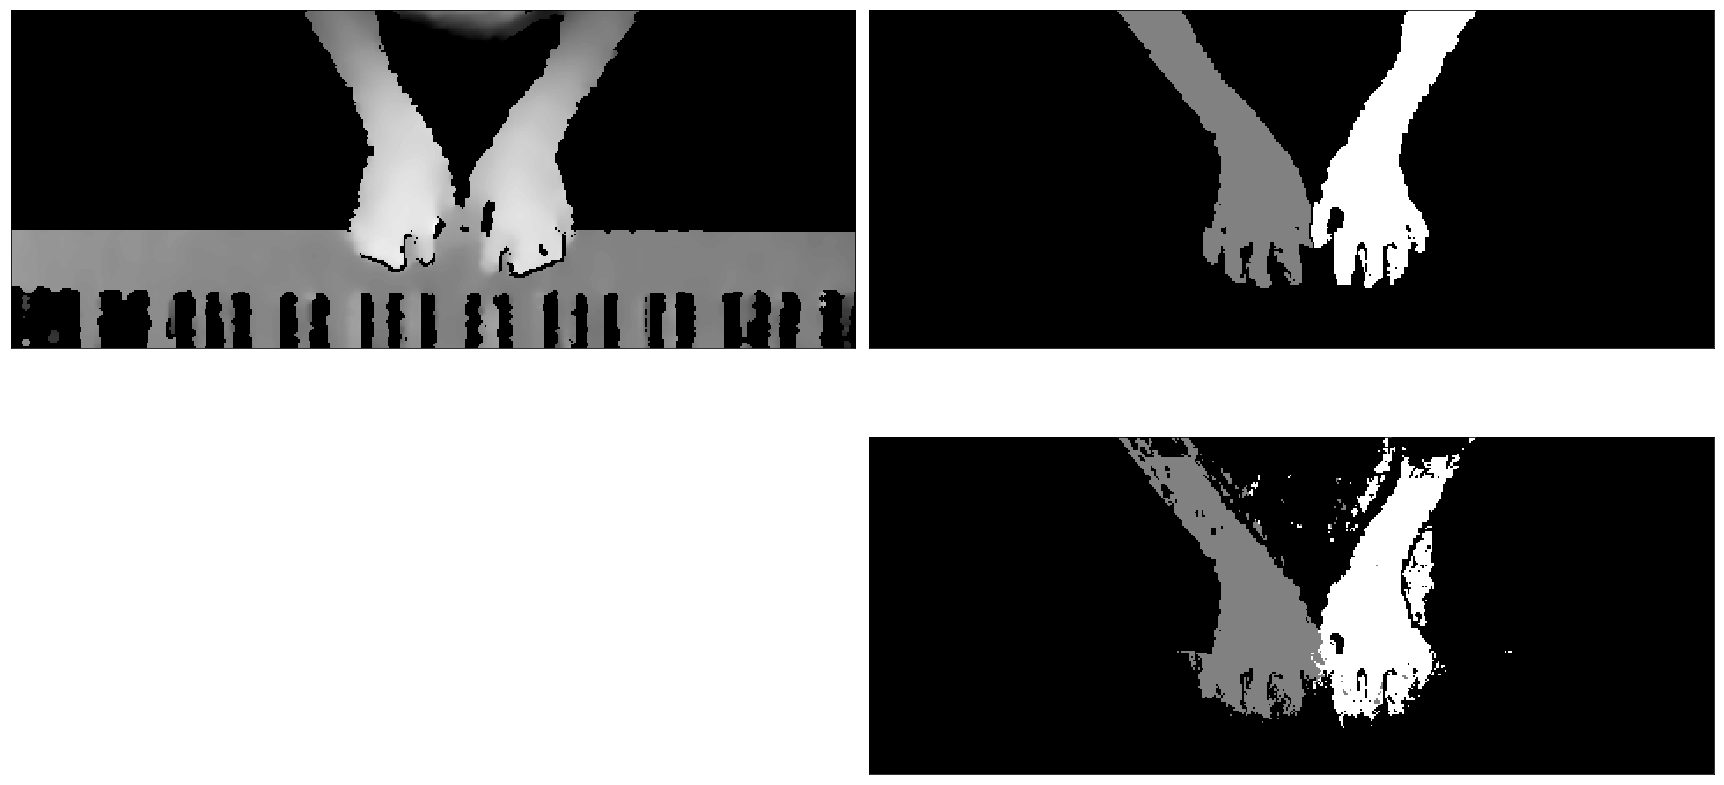

In [47]:
plt.figure(figsize=(24,12))
plt.subplot(221)
plt.imshow(dmap_disp, cmap="gray")
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
plt.tight_layout()
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/rdf-dmap.jpg")
# plt.savefig("temp/rdf-dmap.jpg")

plt.subplot(222)
plt.imshow(mask_disp, cmap="gray")
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
# # plt.savefig("dmap-norm.pdf")

plt.subplot(224)
plt.imshow(mask_pred, cmap="gray")
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# # plt.tight_layout()

In [3]:
dcf_results = np.load("rdf_dcf_results_02_07.npz")
dif_results = np.load("rdf_dif_results-02-19.npz")

In [4]:
dcf_acc = dcf_results["accuracy"]
dcf_f_score = dcf_results["f_score"]
dif_acc = dif_results["accuracy"]
dif_f_score = dif_results["f_score"]

In [5]:
print(np.average(dcf_f_score))
print(np.average(dif_f_score))

0.934464510552
0.924960017689


In [6]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)

#### Accuracy

[  25.      40.625   56.25    71.875   87.5    103.125  118.75   134.375
  150.   ]


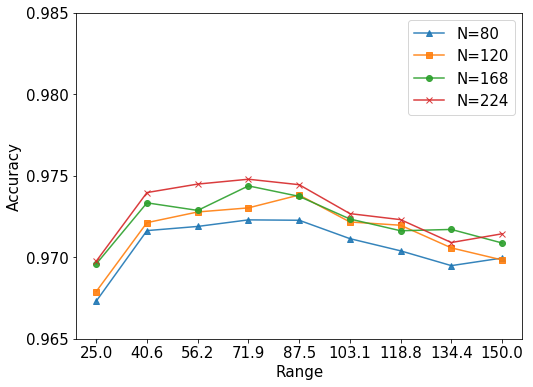

In [7]:
x_vals = np.linspace(25, 150, 9)
print(x_vals)

markers = ["^", "s", "o", "x"]

f = plt.figure(figsize=(8,6))
axes = plt.gca()
axes.set_ylim([.965, .985])
axes.set_yticks(np.linspace(.965, .985, 5))
plt.ylabel("Accuracy")
axes.set_xticks(x_vals)
plt.xlabel("Range")
for i, m in enumerate(markers):
    plt.plot(x_vals, dif_acc[:,i], marker=m, alpha=.9)
plt.legend(['N=80', 'N=120', 'N=168', 'N=224'])
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/raw/rdf-dif-results.jpg")
plt.savefig("temp/rdf-dif-results.pdf")

[ 0.1    0.125  0.15   0.175  0.2    0.225  0.25   0.275  0.3  ]


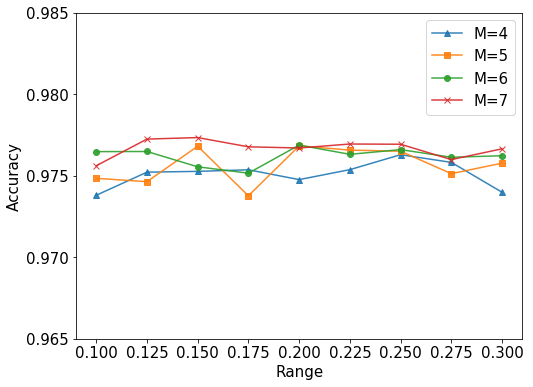

In [8]:
x_vals = np.linspace(.1, .3, 9)
print(x_vals)

f = plt.figure(figsize=(8,6))

axes = plt.gca()
axes.set_ylim([.965,.985])
axes.set_yticks(np.linspace(.965, .985, 5))
plt.ylabel("Accuracy")
axes.set_xticks(x_vals)
plt.xlabel("Range")
markers = ["^", "s", "o", "x"]
for i, m in enumerate(markers):
    plt.plot(x_vals, dcf_acc[:,i], marker=m, alpha=.9)
plt.legend(['M=4', 'M=5', 'M=6', 'M=7'])
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/raw/rdf-dcf-results.jpg")
plt.savefig("temp/rdf-dcf-results.pdf")

#### F1 Score

[  25.      40.625   56.25    71.875   87.5    103.125  118.75   134.375
  150.   ]


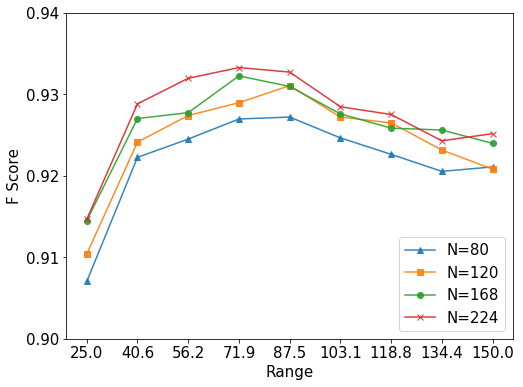

In [9]:
x_vals = np.linspace(25, 150, 9)
print(x_vals)

markers = ["^", "s", "o", "x"]

f = plt.figure(figsize=(8,6))
axes = plt.gca()
axes.set_ylim([.905,.940])
axes.set_yticks(np.linspace(.90,.940, 5))
plt.ylabel("F Score")
axes.set_xticks(x_vals)
plt.xlabel("Range")
for i, m in enumerate(markers):
    plt.plot(x_vals, dif_f_score[:,i], marker=m, alpha=.9)
plt.legend(['N=80', 'N=120', 'N=168', 'N=224'], loc="lower right")
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/raw/rdf-dif-fscore-results.jpg")
plt.savefig("temp/rdf-dif-fscore-results.pdf")

[ 0.1    0.125  0.15   0.175  0.2    0.225  0.25   0.275  0.3  ]


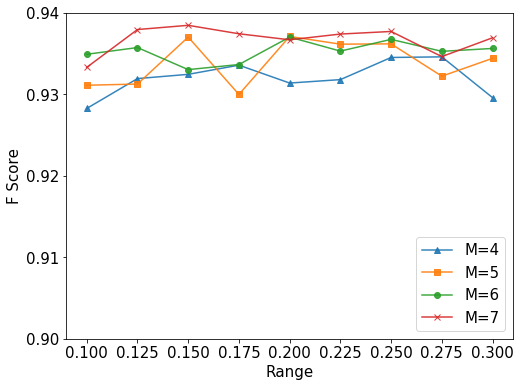

In [11]:
x_vals = np.linspace(.1, .3, 9)
print(x_vals)

markers = ["^", "s", "o", "x"]
f = plt.figure(figsize=(8,6))

axes = plt.gca()
axes.set_ylim([.900,.940])
axes.set_yticks(np.linspace(.90,.940, 5))
plt.ylabel("F Score")
axes.set_xticks(x_vals)
plt.xlabel("Range")
for i, m in enumerate(markers):
    plt.plot(x_vals, dcf_f_score[:,i], marker=m, alpha=.9)
plt.legend(['M=4', 'M=5', 'M=6', 'M=7'], loc="lower right")
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/raw/rdf-dcf-fscore-results.jpg")
plt.savefig("temp/rdf-dcf-fscore-results.pdf")

### Augmented Results

In [30]:
aug_results = np.load("rdf_dcf_results_augmented1-M5.npz")
aug_acc = aug_results["accuracy"]
aug_f_score = aug_results["f_score"]

In [31]:
print(aug_acc)
print(aug_f_score)

[[ 0.97362991]
 [ 0.96812675]
 [ 0.97352967]]
[[ 0.93003396]
 [ 0.9198    ]
 [ 0.93050358]]


[ 0.1    0.175  0.25 ]


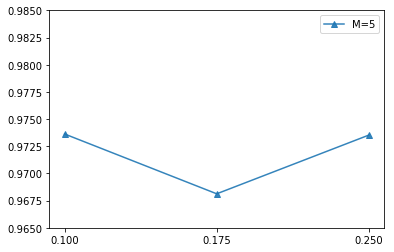

In [32]:
x_vals = np.linspace(.1, .25, 3)
print(x_vals)

markers = ["^"]

axes = plt.gca()
axes.set_ylim([.965,.985])
axes.set_xticks(x_vals)
for i, m in enumerate(markers):
    plt.plot(x_vals, aug_acc[:,i], marker=m, alpha=.9)
plt.legend(['M=5'])
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/rdf-aug-results.jpg")

In [96]:
## HOG Data
f1_scores_reg_avg = np.array([[.656, .657, .637],
                              [.658, .642, .607],
                              [.649, .607, .598],
                              [.613, .612, .612]])

f1_scores_bl1_avg = np.array([[.653, .658, .630],
                              [.660, .632, .606],
                              [.647, .606, .598],
                              [.614, .609, .609]])

f1_scores_bl2_avg = np.array([[.651, .660, .636],
                              [.664, .633, .606],
                              [.641, .600, .594],
                              [.592, .588, .587]])

f1_scores_svm_avg = np.array([[.611, .633, .627],
                              [.637, .630, .603],
                              [.647, .614, .601],
                              [.639, .636, .641]])

x =  np.array([.0001, .001, .01, .1])

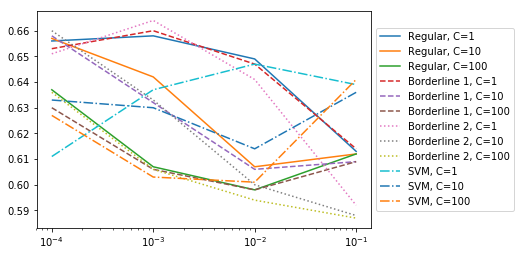

In [100]:
ax = plt.gca()
ax.set_xscale("log")
plt.plot(x, f1_scores_reg_avg, "-")
plt.plot(x, f1_scores_bl1_avg, "--")
plt.plot(x, f1_scores_bl2_avg, ":")
plt.plot(x, f1_scores_svm_avg, "-.")
plt.legend(['Regular, C=1', 'Regular, C=10', 'Regular, C=100', 
            'Borderline 1, C=1', 'Borderline 1, C=10', 'Borderline 1, C=100',
            'Borderline 2, C=1', 'Borderline 2, C=10', 'Borderline 2, C=100',
            'SVM, C=1', 'SVM, C=10', 'SVM, C=100'], loc='center left', bbox_to_anchor=(1, 0.5))

In [36]:
np.linspace(.15, .25, 5)

array([ 0.15 ,  0.175,  0.2  ,  0.225,  0.25 ])

In [37]:
import pickle

In [39]:
results = pickle.load(open("individual_results.pkl", "rb"))

In [46]:
print(results["p1"]["cv0_report"])

             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1989
          1       1.00      0.10      0.19        48
          2       0.71      0.90      0.79       363

avg / total       0.93      0.92      0.92      2400

